# Machine Learning 2 - Assignment \#1 <br> Data Science Specialization University of Antioquia

Professor: Hernán Felipe García Arias, PhD

March 5, 2025

## Overview

In this assignment, you will explore clustering techniques by implementing the Gaussian Mixture Model (GMM) from scratch and applying it to two datasets. You will also implement the Elbow and Silhouette methods in combination with K-Means or GMM to evaluate the optimal number of clusters based on several performance metrics.

This assignment is divided into two tasks:

1. Implementing the Gaussian Mixture Model and evaluating clustering performance using the Rand Index.
2. Evaluating clustering quality and the optimal number of clusters using the Elbow method, Silhouette analysis, and clustering metrics.

## Assignment 1: Implement Gaussian Mixture Model (GMM)

In this task, you are required to implement the GMM algorithm from scratch and apply it to the FIFA 23 Players Dataset and the EastWestAirlines Dataset for clustering. You should evaluate the performance of your clustering results using both qualitative and quantitative measures.

## Datasets

- FIFA 23 Players Dataset: This dataset contains detailed attributes of professional soccer players. The objective is to cluster players based on their skills and playing styles. Relevant features for clustering include:
- Age
- Overall rating (general skill level)
- Potential (maximum projected skill level)
- Value (market price in €)
- Wage (weekly salary)
- Shooting, Passing, Dribbling (technical abilities)
- Defending, Physicality (defensive capabilities)

You can download the dataset from Kaggle: FIFA 23 Dataset - Kaggle.

- EastWestAirlines Dataset: This dataset contains information about airline customers and their behaviors. You should preprocess the dataset as necessary before applying the clustering algorithm. (Dataset available here.)


## Tasks

1. Implement the Gaussian Mixture Model algorithm from scratch. Do not use libraries like scikit-learn's GMM implementation for this part.
2. Fit the GMM to both datasets (FIFA 23 Players and EastWestAirlines) and perform clustering.
3. Evaluate your clustering results using the following methods:

- Rand Index: Calculate the Rand Index to compare your clustering results against meaningful labels (e.g., player positions). Read more about the Rand Index here: Rand Index - Wikipedia.
- Qualitative Evaluation: For both datasets, visualize and describe the resulting clusters (e.g., scatter plots, pair plots, or other visualizations that highlight the formed groups). For visualizations in Python, you may refer to this guide: Seaborn Visualization Library.


## Hints and Useful Links

- For a detailed explanation on how Gaussian Mixture Models work and how to implement them, see this tutorial: Gaussian Mixture Model - scikit-learn documentation.
- To understand the mathematical background and principles behind GMM, this reference may help: Mixture Model - Wikipedia.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
csv_url = 'https://raw.githubusercontent.com/jmparradov/Machine-Learning-II---Talleres/refs/heads/main/Data/FIFA23_official_data.csv'

try:
    df = pd.read_csv(csv_url)
    print("Data imported successfully!")
    # Now you can work with the DataFrame 'df'
    # For example, to display the first 5 rows:
    print(df.head())

except Exception as e:
    print(f"An error occurred: {e}")


Data imported successfully!
       ID             Name  Age  \
0  209658      L. Goretzka   27   
1  212198  Bruno Fernandes   27   
2  224334         M. Acuña   30   
3  192985     K. De Bruyne   31   
4  224232       N. Barella   25   

                                              Photo Nationality  \
0  https://cdn.sofifa.net/players/209/658/23_60.png     Germany   
1  https://cdn.sofifa.net/players/212/198/23_60.png    Portugal   
2  https://cdn.sofifa.net/players/224/334/23_60.png   Argentina   
3  https://cdn.sofifa.net/players/192/985/23_60.png     Belgium   
4  https://cdn.sofifa.net/players/224/232/23_60.png       Italy   

                                  Flag  Overall  Potential               Club  \
0  https://cdn.sofifa.net/flags/de.png       87         88  FC Bayern München   
1  https://cdn.sofifa.net/flags/pt.png       86         87  Manchester United   
2  https://cdn.sofifa.net/flags/ar.png       85         85         Sevilla FC   
3  https://cdn.sofifa.net/flags/be

In [ ]:
# Columns to keep
columns_to_keep = ['Name', 'Age', 'Overall', 'Potential', 'Value', 'Wage', 'Preferred Foot', 'Weak Foot', 'Skill Moves']

# Create a new DataFrame with only the selected columns
df = df[columns_to_keep]

# Now df_selected contains only the desired columns
print(df.head())


              Name  Age  Overall  Potential    Value   Wage Preferred Foot  \
0      L. Goretzka   27       87         88     €91M  €115K          Right   
1  Bruno Fernandes   27       86         87   €78.5M  €190K          Right   
2         M. Acuña   30       85         85   €46.5M   €46K           Left   
3     K. De Bruyne   31       91         91  €107.5M  €350K          Right   
4       N. Barella   25       86         89   €89.5M  €110K          Right   

   Weak Foot  Skill Moves  
0        4.0          3.0  
1        3.0          4.0  
2        3.0          3.0  
3        5.0          4.0  
4        3.0          3.0  


In [ ]:
# prompt: convert the values from the files Value and Wage to floats, identify the format origin

# Convert 'Value' and 'Wage' columns to numeric, handling errors
df['Value'] = df['Value'].astype(str).str.replace('€', '', regex=False)
df['Wage'] = df['Wage'].astype(str).str.replace('€', '', regex=False)

def convert_currency(value):
    if 'M' in value:
        return float(value.replace('M', '')) * 1000000
    elif 'K' in value:
        return float(value.replace('K', '')) * 1000
    else:
        return float(value)

df['Value'] = df['Value'].apply(convert_currency)
df['Wage'] = df['Wage'].apply(convert_currency)

# Identify the original format
df.head()


,Name,Age,Overall,Potential,Value,Wage,Preferred Foot,Weak Foot,Skill Moves
0,L. Goretzka,27,87,88,91000000.0,115000.0,Right,4.0,3.0
1,Bruno Fernandes,27,86,87,78500000.0,190000.0,Right,3.0,4.0
2,M. Acuña,30,85,85,46500000.0,46000.0,Left,3.0,3.0
3,K. De Bruyne,31,91,91,107500000.0,350000.0,Right,5.0,4.0
4,N. Barella,25,86,89,89500000.0,110000.0,Right,3.0,3.0


In [ ]:
df.describe()

,Age,Overall,Potential,Value,Wage,Weak Foot,Skill Moves
count,17660.000000,17660.000000,17660.000000,1.766000e+04,17660.000000,17660.000000,17660.000000
mean,23.127746,63.369592,70.981200,2.739788e+06,8189.807475,2.900340,2.297169
std,4.639821,8.036268,6.529836,7.841276e+06,20476.733001,0.663523,0.754264
min,15.000000,43.000000,42.000000,0.000000e+00,0.000000,1.000000,1.000000
25%,20.000000,58.000000,67.000000,3.250000e+05,550.000000,3.000000,2.000000
50%,22.000000,63.000000,71.000000,7.000000e+05,2000.000000,3.000000,2.000000
75%,26.000000,69.000000,75.000000,1.725000e+06,6000.000000,3.000000,3.000000
max,54.000000,91.000000,95.000000,1.905000e+08,450000.000000,5.000000,5.000000


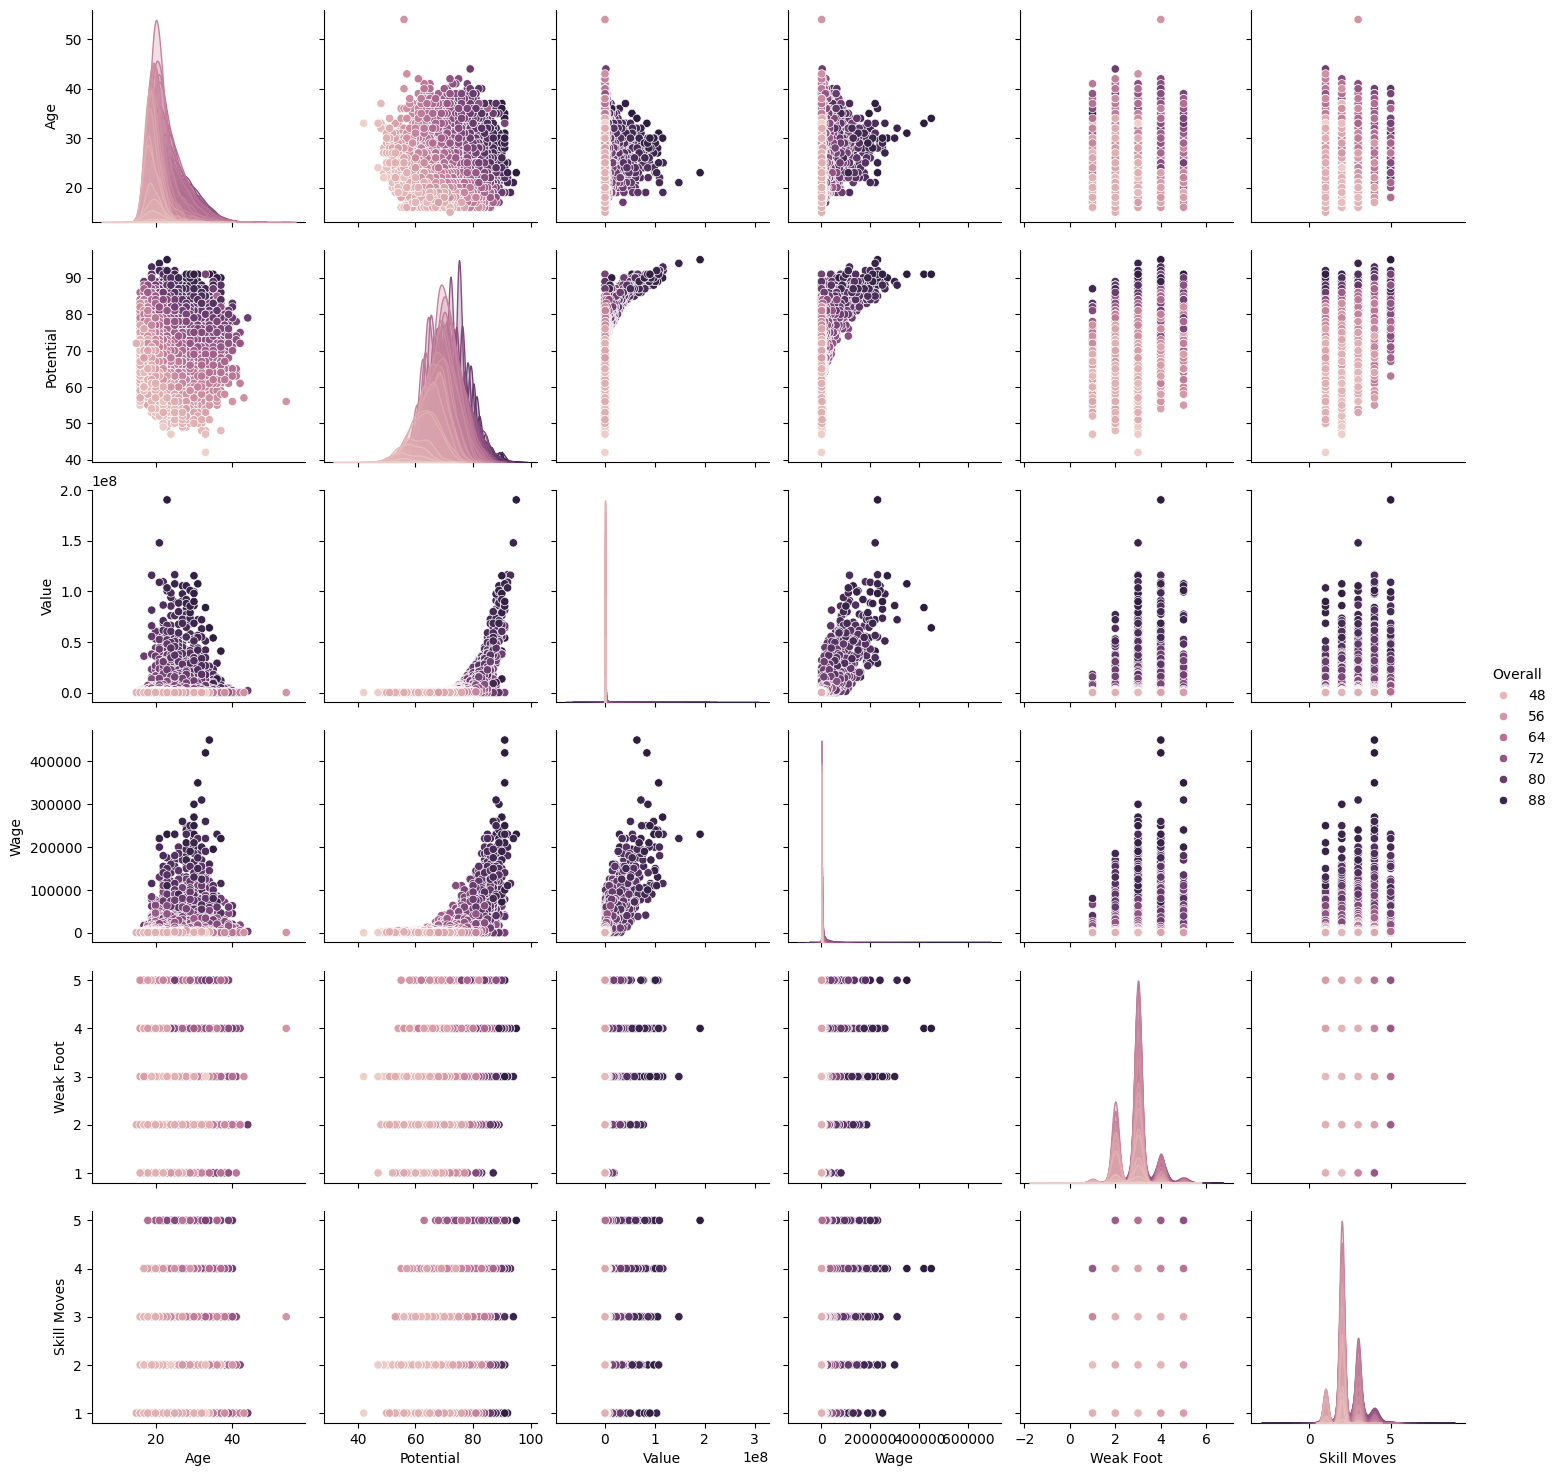

In [ ]:
sns.pairplot(df, hue='Overall')


In [ ]:
# Convert the DataFrame to a NumPy array
X = df.to_numpy()

# Display the dimensions of the NumPy array
X.shape


(17660, 9)

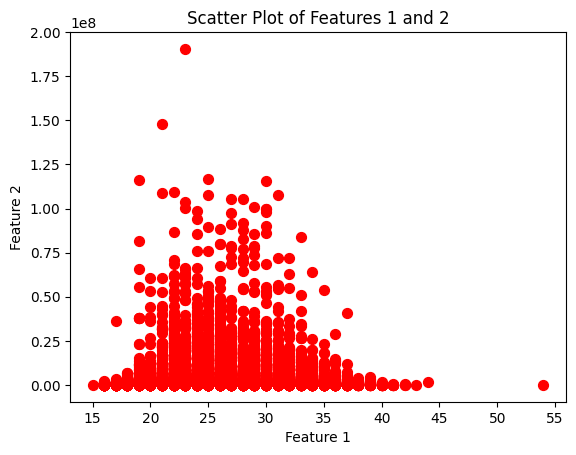

In [ ]:
# Seleccionemos como prueba los features 0, 2
plt.scatter(X[:,1], X[:,4], marker='o', color='r', s=50)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot of Features 1 and 2')
plt.show()

[[3.07692308e-01 4.77690289e-01]
 [3.07692308e-01 4.12073491e-01]
 [3.84615385e-01 2.44094488e-01]
 ...
 [2.56410256e-01 3.67454068e-04]
 [7.69230769e-02 4.72440945e-04]
 [1.28205128e-01 4.72440945e-04]]


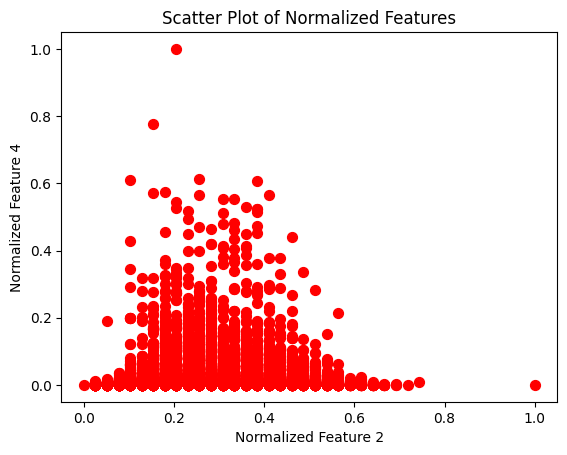

In [ ]:
# prompt: normalaize all the numeric values on X

import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Assuming X is your NumPy array
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X[:, [1,4]]) # Apply normalization to selected columns (2 and 4)

# Now X_normalized contains the normalized values for features 2 and 4
print(X_normalized)

plt.scatter(X_normalized[:,0], X_normalized[:,1], marker='o', color='r', s=50)
plt.xlabel('Normalized Feature 2')
plt.ylabel('Normalized Feature 4')
plt.title('Scatter Plot of Normalized Features')
plt.show()


In [ ]:
# Inicializar aleatoriamente los theta_old
# Fija el mnúmero de clusters K = 3
np.random.seed(41)
pi1 = 0.035
pi2 = 0.005
pi3 = 0.006
mu_1 = np.random.randn(2,) + np.reshape([0.3,0.1],(2,))
mu_2 = np.random.randn(2,) + np.reshape([0.1,0.2],(2,))
mu_3 = np.random.randn(2,) + np.reshape([0.3,0.4],(2,))
print(mu_1, mu_2, mu_3)

[0.02928768 0.20484805] [ 0.35052782 -0.72519997] [ 0.86714366 -0.64018022]


In [ ]:
aux = np.random.randn(2,2)
print(aux)
Sigma_1 =0.5*aux.T@aux
aux2 = np.random.randn(2,2)
Sigma_2 = 0.5*aux2.T@aux2
aux3 = np.random.randn(2,2)
Sigma_3 = 0.5*aux3.T@aux3
print(Sigma_1, np.linalg.det(Sigma_1))
print(Sigma_2, np.linalg.det(Sigma_2))
print(Sigma_3, np.linalg.det(Sigma_3))


[[-0.15367595  0.78985181]
 [-1.22621585 -0.94800699]]
[[0.7636108  0.52053998]
 [0.52053998 0.76129157]] 0.3103685894037197
[[0.45918942 0.29130823]
 [0.29130823 0.4779795 ]] 0.13462264428837636
[[ 0.71931372 -1.03799224]
 [-1.03799224  1.73216241]] 0.1685403042513029


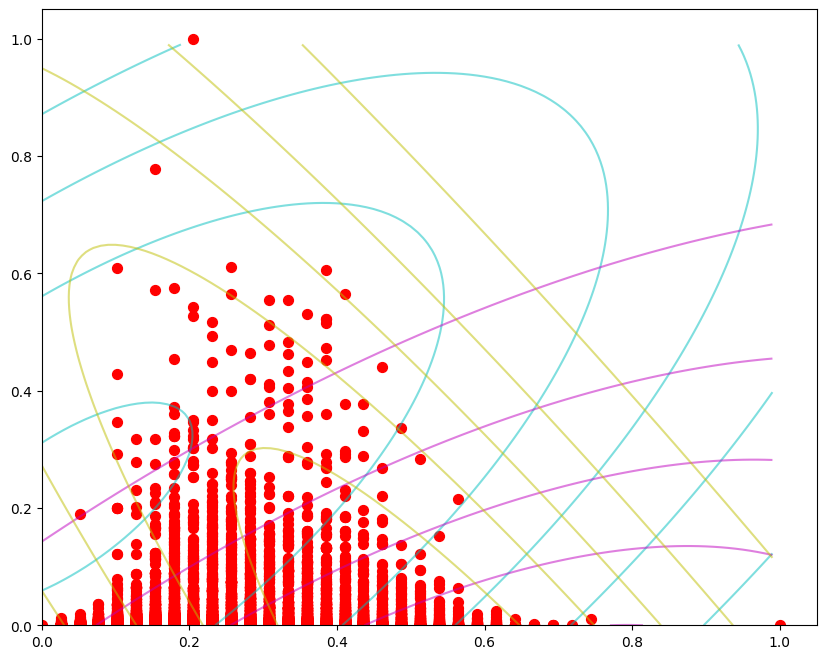

In [ ]:
# Graficamos el ajuste inicial
from scipy.stats import multivariate_normal

# Create a grid of points
x, y = np.mgrid[0:1:.01, 0:1:.01]
pos = np.dstack((x, y))

# Calculate the Gaussian probability density function for each class
rv1 = multivariate_normal(mu_1, Sigma_1)
rv2 = multivariate_normal(mu_2, Sigma_2)
rv3 = multivariate_normal(mu_3, Sigma_3)
z1 = rv1.pdf(pos)
z2 = rv2.pdf(pos)
z3 = rv3.pdf(pos)

# Plot the Gaussian distributions
plt.figure(figsize=(10, 8))
plt.contour(x, y, z1, levels=5, colors='c', alpha=0.5)
plt.contour(x, y, z2, levels=5, colors='m', alpha=0.5)
plt.contour(x, y, z3, levels=5, colors='y', alpha=0.5)

plt.scatter(X_normalized[:,0], X_normalized[:,1], marker='o', color='r', s=50)

In [ ]:
gama_Znk = np.zeros((X_normalized.shape[0],3)) # Matriz de responsabilidades o Posterior P(zn|xn)

for n in range(X.shape[0]):
  x_n = X_normalized[n,:]
  for k in range(3):
    if k == 0:
      gama_Znk[n,k] = pi1 * multivariate_normal.pdf(x_n, mu_1, Sigma_1)/(pi1 * rv1.pdf(x_n) + pi2 * rv2.pdf(x_n) + pi3 * rv3.pdf(x_n))
    if k == 1:
      gama_Znk[n,k] = pi2 * multivariate_normal.pdf(x_n, mu_2, Sigma_2)/(pi1 * rv1.pdf(x_n) + pi2 * rv2.pdf(x_n) + pi3 * rv3.pdf(x_n))
    if k == 2:
      gama_Znk[n,k] = pi3 * multivariate_normal.pdf(x_n, mu_3, Sigma_3)/(pi1 * rv1.pdf(x_n) + pi2 * rv2.pdf(x_n) + pi3 * rv3.pdf(x_n))

print(gama_Znk)

[[0.84815653 0.0147547  0.13708877]
 [0.83622351 0.01886378 0.14491271]
 [0.79164625 0.04236369 0.16599007]
 ...
 [0.779244   0.07090308 0.14985291]
 [0.87036055 0.04701678 0.08262267]
 [0.84596045 0.05322565 0.1008139 ]]


In [ ]:
# Construirmos el modelo discriminante
N1, N2, N3 = 50,50,50
N = N1+N2+N3
piC1 = N1/N
piC2 = N2/N
piC3 = N3/N


X_C1 = X_normalized[:50,:2]
X_C2 = X_normalized[50:100,:2]
X_C3 = X_normalized[100:150,:2]

muC1 = np.mean(X_C1, axis=0)
muC2 = np.mean(X_C2, axis=0)
muC3 = np.mean(X_C3, axis=0)

M1 = np.tile(muC1, (N1,1))
M2 = np.tile(muC2, (N2,1))
M3 = np.tile(muC3, (N3,1))

S1 = (1./N1) * (X_C1 - M1).T.dot(X_C1 - M1)
S2 = (1./N2) * (X_C2 - M2).T.dot(X_C2 - M2)
S3 = (1./N3) * (X_C3 - M3).T.dot(X_C3 - M3)

Sigma = (N1/N)*S1 + (N2/N)*S2 + (N3/N)*S3

In [ ]:
w_C1 = np.linalg.inv(Sigma).dot(muC1)
w_C2 = np.linalg.inv(Sigma).dot(muC2)
w_C3 = np.linalg.inv(Sigma).dot(muC3)

w_10 = -0.5 * (muC1.T.dot(np.linalg.inv(Sigma)).dot(muC1)) + np.log(piC1)
w_20 = -0.5 * (muC2.T.dot(np.linalg.inv(Sigma)).dot(muC2))+ np.log(piC2)
w_30 = -0.5 * (muC3.T.dot(np.linalg.inv(Sigma)).dot(muC3))+ np.log(piC3)

A1 = w_C1.T.dot(X_normalized.T) + w_10
A2 = w_C2.T.dot(X_normalized.T) + w_20
A3 = w_C3.T.dot(X_normalized.T) + w_30

A = np.vstack((A1,A2,A3)).T

In [ ]:
postCk = np.exp(A) / np.sum(np.exp(A), axis=1, keepdims=True)

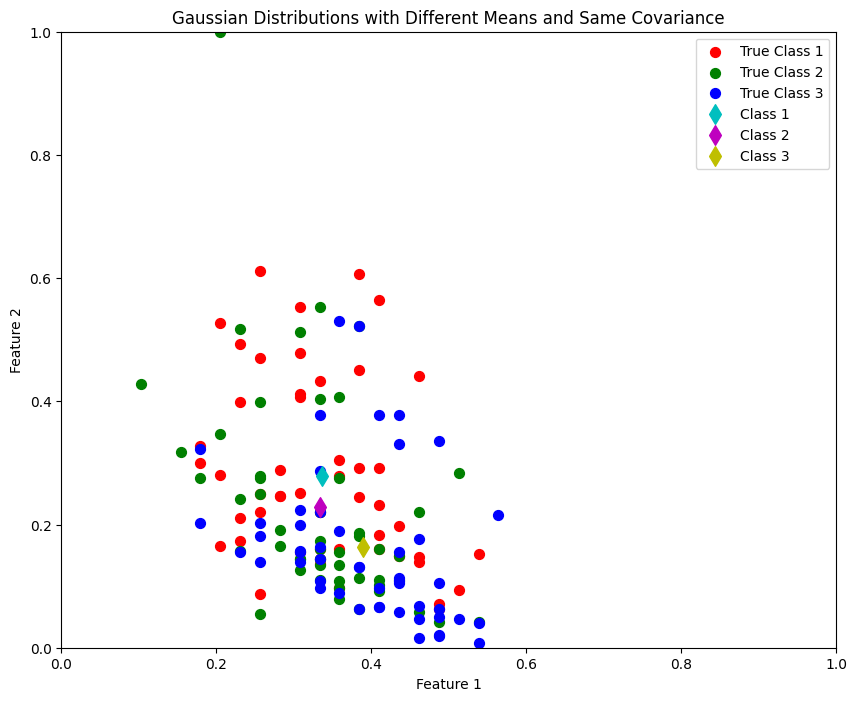

In [ ]:
from scipy.stats import multivariate_normal

# Create a grid of points
x, y = np.mgrid[2.5:8.5:.01, 1.5:5:.01]
pos = np.dstack((x, y))

# Calculate the Gaussian probability density function for each class
rv1 = multivariate_normal(muC1, Sigma)
rv2 = multivariate_normal(muC2, Sigma)
rv3 = multivariate_normal(muC3, Sigma)
z1 = rv1.pdf(pos)
z2 = rv2.pdf(pos)
z3 = rv3.pdf(pos)

# Plot the Gaussian distributions
plt.figure(figsize=(10, 8))
plt.contour(x, y, z1, levels=5, colors='c', alpha=0.5)
plt.contour(x, y, z2, levels=5, colors='m', alpha=0.5)
plt.contour(x, y, z3, levels=5, colors='y', alpha=0.5)

# Plot the means of each class
plt.scatter(X_C1[:,0], X_C1[:,1], marker='o', color='r', s=50, label='True Class 1')
plt.scatter(X_C2[:,0], X_C2[:,1], marker='o', color='g', s=50, label='True Class 2')
plt.scatter(X_C3[:,0], X_C3[:,1], marker='o', color='b', s=50, label='True Class 3')

plt.scatter(muC1[0], muC1[1], marker='d', color='c', s=100, label='Class 1')
plt.scatter(muC2[0], muC2[1], marker='d', color='m', s=100, label='Class 2')
plt.scatter(muC3[0], muC3[1], marker='d', color='y', s=100, label='Class 3')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Gaussian Distributions with Different Means and Same Covariance')

# Set the x and y axis limits to 0 and 1
plt.xlim(0, 1)
plt.ylim(0, 1)

plt.legend()
plt.show()


##Estimacion de parámetros

In [ ]:
# Initialize parameters
n_samples, n_features = X.shape
n_components = 3
weights_ = np.ones(n_components) / n_components
means_ = X[np.random.choice(n_samples, n_components, replace=False)]
covariances_ = [np.eye(n_features) for _ in range(n_components)]

In [ ]:
def e_step(X, weights_, means_, covariances_):
  responsibilities = np.zeros((X.shape[0], n_components))
  for i in range(n_components):
      responsibilities[:, i] = weights_[i] * multivariate_normal.pdf(X, means_[i], covariances_[i])
  responsibilities /= np.sum(responsibilities, axis=1, keepdims=True)
  return responsibilities

In [ ]:
def m_step(X, responsibilities, n_components, weights_, means_, covariances_):

  for i in range(n_components):
      # Update weights
      weights_[i] = np.mean(responsibilities[:, i])

      # Update means
      means_[i] = np.sum(responsibilities[:, i, np.newaxis] * X, axis=0) / np.sum(responsibilities[:, i])

      # Update covariances
      diff = X -  means_[i]
      covariances_[i] = np.sum(responsibilities[:, i, np.newaxis, np.newaxis] * np.einsum('ij,ik->ijk', diff, diff), axis=0) / np.sum(responsibilities[:, i])

In [ ]:
def _log_likelihood( X, weights_, means_, covariances_, n_components):
    log_likelihood = np.sum(np.log(np.sum([weights_[i] * multivariate_normal.pdf(X, means_[i], covariances_[i]) for i in range(n_components)], axis=0)))
    return log_likelihood

In [ ]:
tol=1e-4
max_iter=100
X = X_normalized

# Initialize parameters
n_samples, n_features = X.shape
weights = np.ones(n_components) / n_components
means= X[np.random.choice(n_samples, n_components, replace=False)]
covariances = [np.eye(n_features) for _ in range(n_components)]

# Iterate until convergence
for _ in range(max_iter):
    # E-step: Calculate responsibilities
    responsibilities = e_step(X, weights, means, covariances)

    # M-step: Update parameters
    m_step(X, responsibilities,n_components, weights, means, covariances)

    # Check for convergence
    log_likelihood = _log_likelihood(X,weights, means, covariances, n_components)
    print(log_likelihood)
    if _ > 0 and abs(log_likelihood - prev_log_likelihood_) < tol:
        break
    prev_log_likelihood_ = log_likelihood

44081.4603651776
46203.82201945323
58252.6866525948
68587.31858889299
72172.45221405225
74596.57938644268
76333.82257801438
77168.24654212163
77531.01543211177
77745.84641749893
77906.58025742853
78031.6852048626
78127.07805783999
78198.31311523997
78251.06105730926
78290.14497832682
78319.24225831
78341.03442051071
78357.45312357617
78369.8916228436
78379.36110015647
78386.60115465894
78392.1570836627
78396.4340305739
78399.73516320105
78402.28881125289
78404.26792851546
78405.80417951496
78406.99822883989
78407.9273227981
78408.65092161443
78409.21491446043
78409.6547946793
78409.99806546824
78410.2660715546
78410.47539972322
78410.63895352131
78410.76678043696
78410.86671018694
78410.94484830616
78411.00595853254
78411.05375949488
78411.09115520665
78411.12041433086
78411.14330973211
78411.16122719951
78411.1752502092
78411.18622604487
78411.19481740265
78411.20154268402
78411.20680746846
78411.21092910427
78411.21415592812
78411.21668228984
78411.21866030086
78411.22020902207
78411

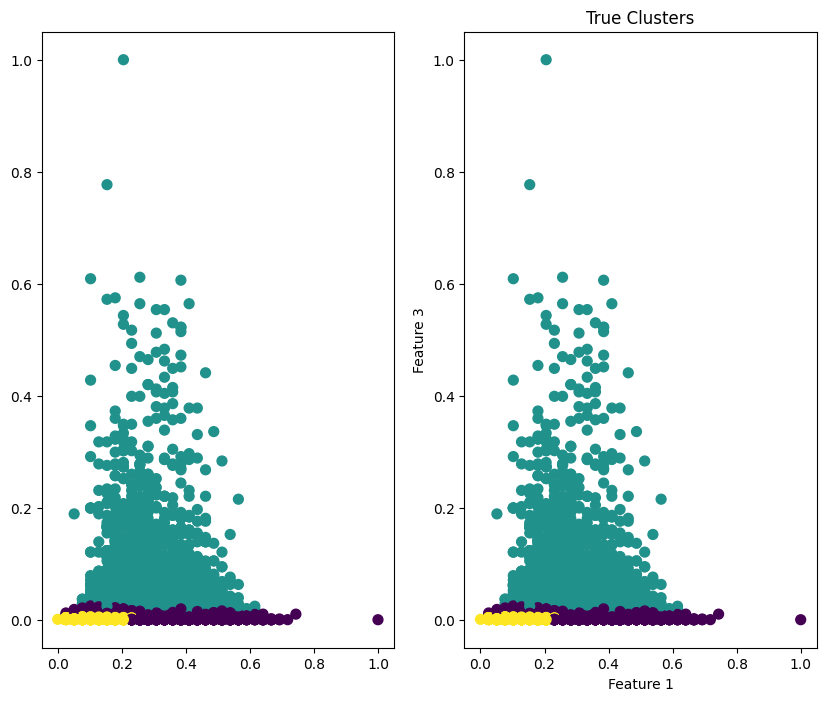

In [ ]:
Z = responsibilities
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(10, 8))
ax[0].scatter(X[:,0], X[:,1], marker='o', c = np.argmax(Z,axis = 1), s=50)
plt.xlabel('Feature 1')
plt.ylabel('Feature 3')
plt.title('Inferred Clusters with GMM')
ax[1].scatter(X[:,0], X[:,1], marker='o', c = np.argmax(Z,axis = 1), s=50)
plt.xlabel('Feature 1')
plt.ylabel('Feature 3')
plt.title('True Clusters')
plt.show()


## Assignment 2: Evaluating Clustering with Elbow and Silhouette Methods

In this task, you will evaluate the performance of clustering algorithms (K-Means or GMM) using the Elbow method and Silhouette analysis. You will also investigate the impact of clustering on four relevant metrics.

## Tasks

1. Implement the Elbow method and Silhouette analysis to determine the optimal number of clusters for both the FIFA 23 and EastWestAirlines datasets.
2. Apply both K-Means and GMM clustering algorithms to each dataset and compare their performance in determining the optimal number of clusters.
3. Evaluate the clustering quality using the following four metrics:

- Silhouette Score: Measures how similar a point is to its own cluster compared to other clusters. Learn more here: Silhouette Score - scikit-learn documentation.
- Inertia: Sum of squared distances of points to their closest cluster center. Explanation can be found here: Inertia and Clustering Evaluation.
- Davies-Bouldin Index: Measures the average similarity ratio of each cluster with its most similar cluster. Learn about it here: Davies-Bouldin Index -scikit-learn documentation.

4. Discuss how the choice of the number of clusters impacts each of the four metrics and provide a recommendation for the optimal number of clusters.

## Deliverables

- Teams must submit an IPYNB notebook (Jupyter notebook) containing the complete solution to the task. This notebook should include:
- An implementation of the Elbow method and Silhouette analysis for both datasets.
- Clustering results using both K-Means and GMM for the FIFA 23 Players and EastWestAirlines datasets.
- An evaluation of the clustering performance based on the four selected metrics.
- A summary of results and analysis, including visualizations, interpretation of the results, and a discussion on how the choice of cluster number impacts clustering quality.


## Grading Rubric

- Correctness of Implementation (40\%): Accurate and complete implementation of the Gaussian Mixture Model and clustering evaluation methods.
- Evaluation and Analysis (30\%): Quality and depth of the evaluation, including correct use of Rand Index, Silhouette, and other metrics.
- Visualization and Reporting (20\%): Clear and informative visualizations, along with a well-structured report explaining your approach and findings.
- Code Quality (10\%): Readability, documentation, and organization of your code.


## Submission

Please submit your Jupyter notebooks in IPYNB format, including the complete code, analysis, and documentation in Markdown cells. The deadline for this assignment is 09/03/2025.



In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt

# Load your datasets (replace with your actual data loading)
fifa_data = pd.read_csv('https://raw.githubusercontent.com/jmparradov/Machine-Learning-II---Talleres/refs/heads/main/Data/FIFA23_official_data.csv')
eastwest_data = pd.read_csv("https://raw.githubusercontent.com/jmparradov/Machine-Learning-II---Talleres/refs/heads/main/Data/EastWestAirlines.csv")

print(eastwest_data)

       ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_m

In [ ]:
eastwest_data = eastwest_data.rename(columns=lambda x: x.strip())

print(eastwest_data.describe())
print(eastwest_data.info())
print(eastwest_data.head())


               ID#       Balance    Qual_miles    cc1_miles    cc2_miles  \
count  3999.000000  3.999000e+03   3999.000000  3999.000000  3999.000000   
mean   2014.819455  7.360133e+04    144.114529     2.059515     1.014504   
std    1160.764358  1.007757e+05    773.663804     1.376919     0.147650   
min       1.000000  0.000000e+00      0.000000     1.000000     1.000000   
25%    1010.500000  1.852750e+04      0.000000     1.000000     1.000000   
50%    2016.000000  4.309700e+04      0.000000     1.000000     1.000000   
75%    3020.500000  9.240400e+04      0.000000     3.000000     1.000000   
max    4021.000000  1.704838e+06  11148.000000     5.000000     3.000000   

         cc3_miles    Bonus_miles  Bonus_trans  Flight_miles_12mo  \
count  3999.000000    3999.000000   3999.00000        3999.000000   
mean      1.012253   17144.846212     11.60190         460.055764   
std       0.195241   24150.967826      9.60381        1400.209171   
min       1.000000       0.000000      

In [ ]:
# prompt: descrube eastwest_data



               ID#       Balance    Qual_miles    cc1_miles    cc2_miles  \
count  3999.000000  3.999000e+03   3999.000000  3999.000000  3999.000000   
mean   2014.819455  7.360133e+04    144.114529     2.059515     1.014504   
std    1160.764358  1.007757e+05    773.663804     1.376919     0.147650   
min       1.000000  0.000000e+00      0.000000     1.000000     1.000000   
25%    1010.500000  1.852750e+04      0.000000     1.000000     1.000000   
50%    2016.000000  4.309700e+04      0.000000     1.000000     1.000000   
75%    3020.500000  9.240400e+04      0.000000     3.000000     1.000000   
max    4021.000000  1.704838e+06  11148.000000     5.000000     3.000000   

         cc3_miles    Bonus_miles  Bonus_trans  Flight_miles_12mo  \
count  3999.000000    3999.000000   3999.00000        3999.000000   
mean      1.012253   17144.846212     11.60190         460.055764   
std       0.195241   24150.967826      9.60381        1400.209171   
min       1.000000       0.000000      

In [ ]:
# Select relevant features for clustering (customize for each dataset)
fifa_features = fifa_data[["Overall", "Potential", "Value", "Wage"]]
eastwest_features = eastwest_data[["Balance", "Qual_miles", "cc1_miles", "cc2_miles", "cc3_miles", "Bonus_miles", "Bonus_trans", "Flight_miles_12mo", "Flight_trans_12", "Days_since_enroll", "Award?"]]



In [ ]:
# --- Elbow Method and Silhouette Analysis ---
def evaluate_clustering(data, max_clusters=10):
    inertia_values = []
    silhouette_values = []
    for n_clusters in range(2, max_clusters + 1):
        # K-Means
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        kmeans_labels = kmeans.fit_predict(data)
        inertia_values.append(kmeans.inertia_)
        silhouette_values.append(silhouette_score(data, kmeans_labels))

    # Plot Elbow Method
    plt.plot(range(2, max_clusters + 1), inertia_values, marker='o')
    plt.title("Elbow Method")
    plt.xlabel("Number of Clusters")
    plt.ylabel("Inertia")
    plt.show()

    # Plot Silhouette Analysis
    plt.plot(range(2, max_clusters + 1), silhouette_values, marker='o')
    plt.title("Silhouette Analysis")
    plt.xlabel("Number of Clusters")
    plt.ylabel("Silhouette Score")
    plt.show()



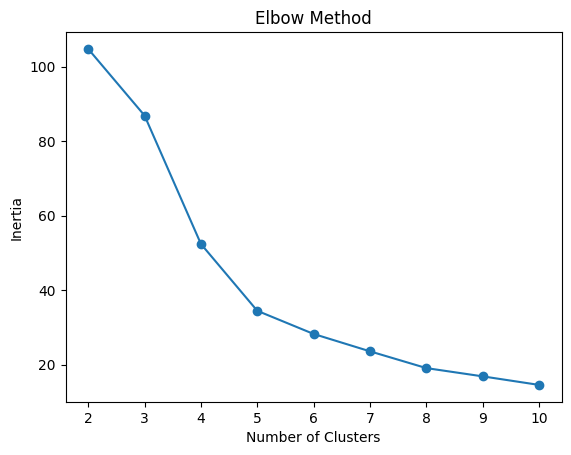

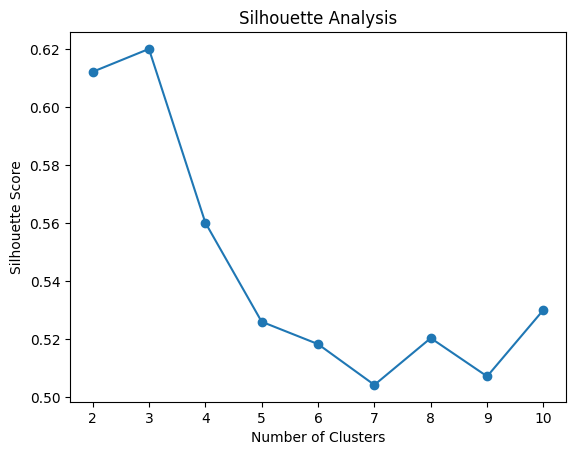

In [ ]:
# Evaluate for FIFA data
evaluate_clustering(X)


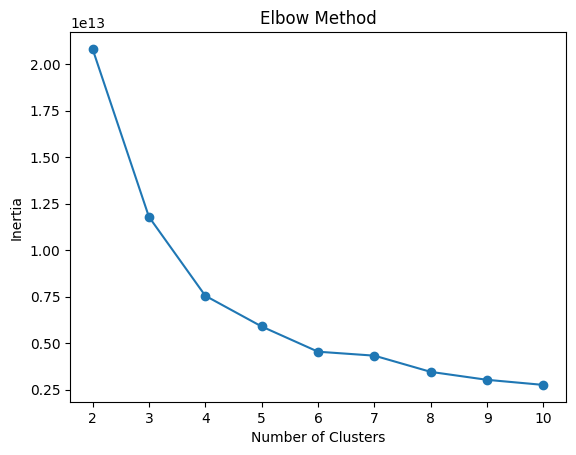

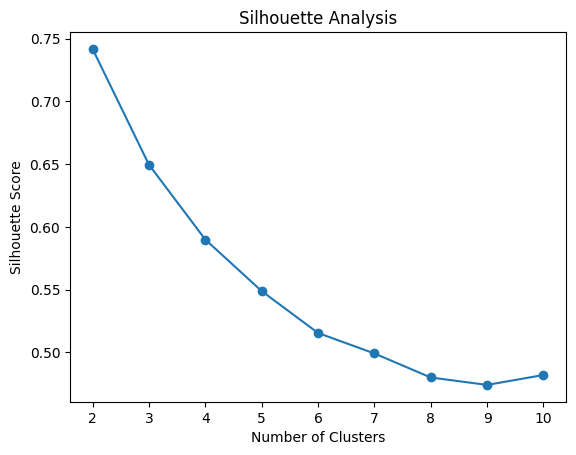

In [ ]:

# Evaluate for EastWestAirlines data
evaluate_clustering(eastwest_features)




In [ ]:
# --- Apply K-Means and GMM ---
def apply_clustering(data, n_clusters):
    # K-Means
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans_labels = kmeans.fit_predict(data)

    # GMM
    gmm = GaussianMixture(n_components=n_clusters, random_state=42)
    gmm_labels = gmm.fit_predict(data)

    # Evaluate using metrics
    kmeans_silhouette = silhouette_score(data, kmeans_labels)
    gmm_silhouette = silhouette_score(data, gmm_labels)
    kmeans_davies_bouldin = davies_bouldin_score(data, kmeans_labels)
    gmm_davies_bouldin = davies_bouldin_score(data, gmm_labels)

    print(f"K-Means (Clusters: {n_clusters}) - Silhouette: {kmeans_silhouette:.3f}, Davies-Bouldin: {kmeans_davies_bouldin:.3f}")
    print(f"GMM (Clusters: {n_clusters}) - Silhouette: {gmm_silhouette:.3f}, Davies-Bouldin: {gmm_davies_bouldin:.3f}")

In [ ]:
# Apply to FIFA data (example with 3 clusters)
apply_clustering(X, n_clusters=3)

# Apply to EastWestAirlines data (example with 4 clusters)
apply_clustering(eastwest_features, n_clusters=4)

K-Means (Clusters: 3) - Silhouette: 0.620, Davies-Bouldin: 0.775
GMM (Clusters: 3) - Silhouette: 0.317, Davies-Bouldin: 1.949
K-Means (Clusters: 4) - Silhouette: 0.590, Davies-Bouldin: 0.621
GMM (Clusters: 4) - Silhouette: 0.223, Davies-Bouldin: 3.922
